### Data Preprocessing


 Importing The Libraries

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Read The Dataset

In [7]:
# Load dataset
file_path = 'patient_data.csv'
df = pd.read_csv(file_path)

# Display first few rows to understand the data
print("First 5 rows of dataset:")
print(df.head())

# Check dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of dataset:
        C    Age History Patient TakeMedication Severity BreathShortness  \
0    Male  18-34     Yes      No             No     Mild              No   
1  Female  18-34     Yes      No             No     Mild              No   
2    Male  35-50     Yes      No             No     Mild              No   
3  Female  35-50     Yes      No             No     Mild              No   
4    Male  51-64     Yes      No             No     Mild              No   

  VisualChanges NoseBleeding Whendiagnoused   Systolic Diastolic  \
0            No          No         <1 Year  111 - 120   81 - 90   
1            No          No         <1 Year  111 - 120   81 - 90   
2            No          No         <1 Year  111 - 120   81 - 90   
3            No          No         <1 Year  111 - 120   81 - 90   
4            No          No         <1 Year  111 - 120   81 - 90   

  ControlledDiet                  Stages  
0             No  HYPERTENSION (Stage-1)  
1             No  HYPER

Handling Missing Values

In [8]:
# Fill missing numerical values with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64


/tmp/ipython-input-8-4103537396.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Handling Categorical Values

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the encoded dataset
print("\nEncoded Dataset:")
print(df.head())


Encoded Dataset:
   C  Age  History  Patient  TakeMedication  Severity  BreathShortness  \
0  1    0        1        0               0         0                0   
1  0    0        1        0               0         0                0   
2  1    1        1        0               0         0                0   
3  0    1        1        0               0         0                0   
4  1    2        1        0               0         0                0   

   VisualChanges  NoseBleeding  Whendiagnoused  Systolic  Diastolic  \
0              0             1               1         1          3   
1              0             1               1         1          3   
2              0             1               1         1          3   
3              0             1               1         1          3   
4              0             1               1         1          3   

   ControlledDiet  Stages  
0               0       0  
1               0       0  
2               0       0 

Label

In [19]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Split into features and target
X = df.drop('Stages', axis=1)
y = df['Stages']

# Remove rare classes (e.g., classes with fewer than 2 samples)
min_samples_per_class = 2
class_counts = Counter(y)
valid_indices = [i for i, label in enumerate(y) if class_counts[label] >= min_samples_per_class]

# Filter the data using iloc and then reset the index
X_filtered = X.iloc[valid_indices].reset_index(drop=True)
y_filtered = y.iloc[valid_indices].reset_index(drop=True)

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

# Print class distribution after filtering
print("\nClass Distribution After Filtering:")
print(Counter(y_filtered))


Class Distribution After Filtering:
Counter({'HYPERTENSION (Stage-1)': 648, 'HYPERTENSION (Stage-2)': 599, 'NORMAL': 336, 'HYPERTENSIVE CRISIS': 240})


### Exploratory Data Analysis (EDA)

Descriptive Statistical Analysis


In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'patient_data.csv'
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check dataset info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of dataset:
        C    Age History Patient TakeMedication Severity BreathShortness  \
0    Male  18-34     Yes      No             No     Mild              No   
1  Female  18-34     Yes      No             No     Mild              No   
2    Male  35-50     Yes      No             No     Mild              No   
3  Female  35-50     Yes      No             No     Mild              No   
4    Male  51-64     Yes      No             No     Mild              No   

  VisualChanges NoseBleeding Whendiagnoused   Systolic Diastolic  \
0            No          No         <1 Year  111 - 120   81 - 90   
1            No          No         <1 Year  111 - 120   81 - 90   
2            No          No         <1 Year  111 - 120   81 - 90   
3            No          No         <1 Year  111 - 120   81 - 90   
4            No          No         <1 Year  111 - 120   81 - 90   

  ControlledDiet                  Stages  
0             No  HYPERTENSION (Stage-1)  
1             No  HYPER

### Visual Analysis

Univariate Analysis

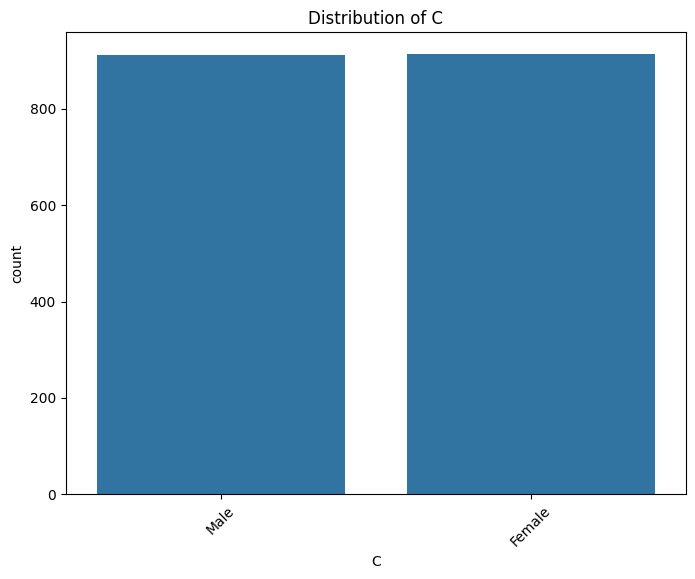

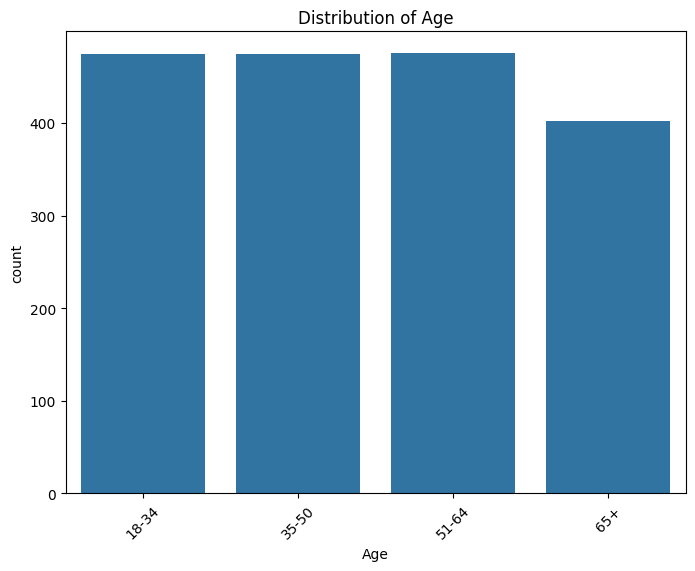

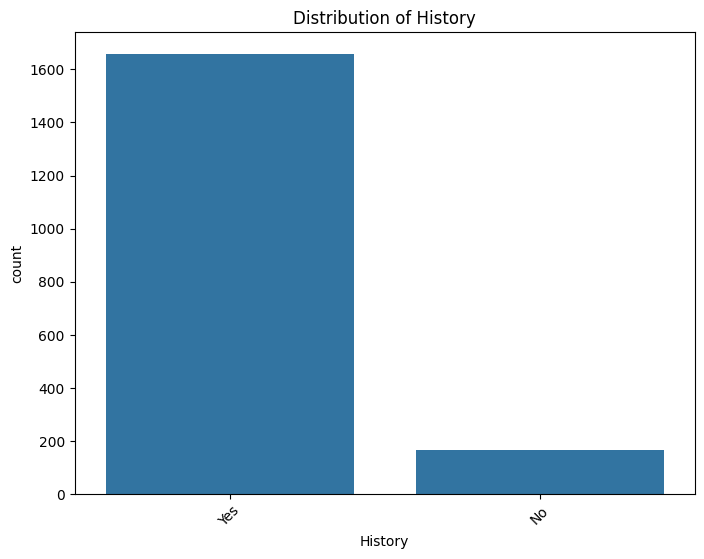

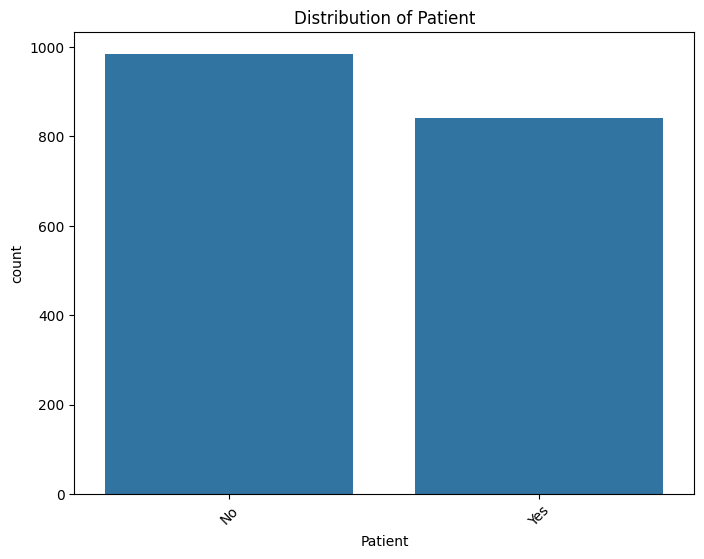

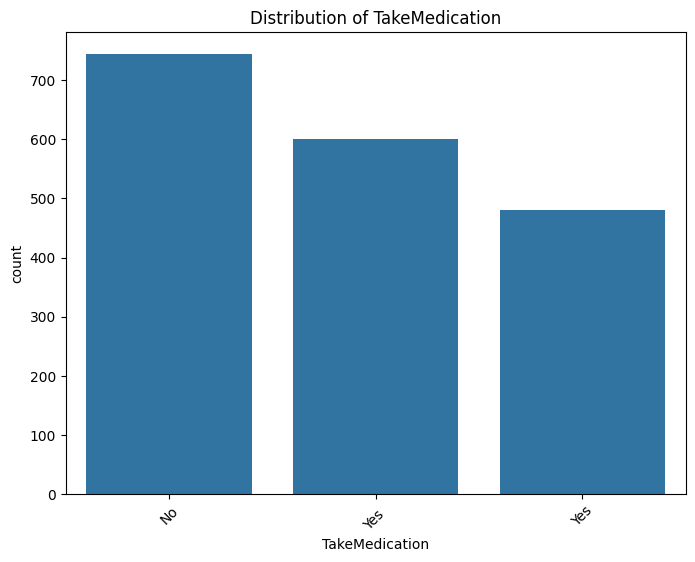

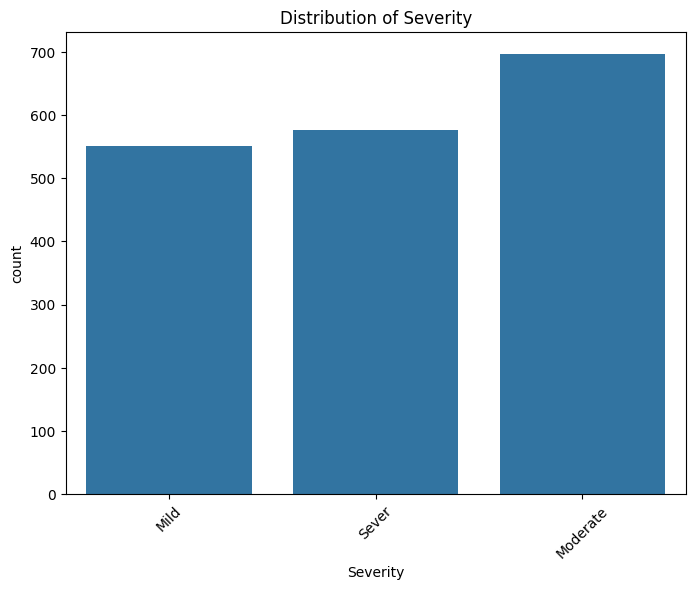

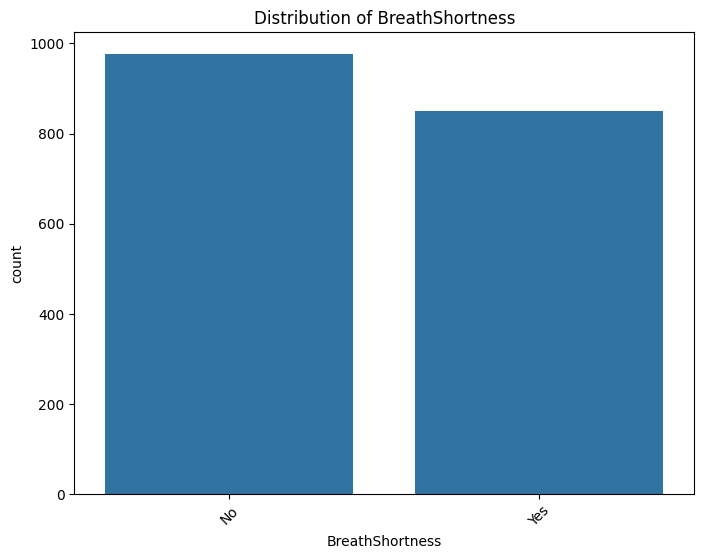

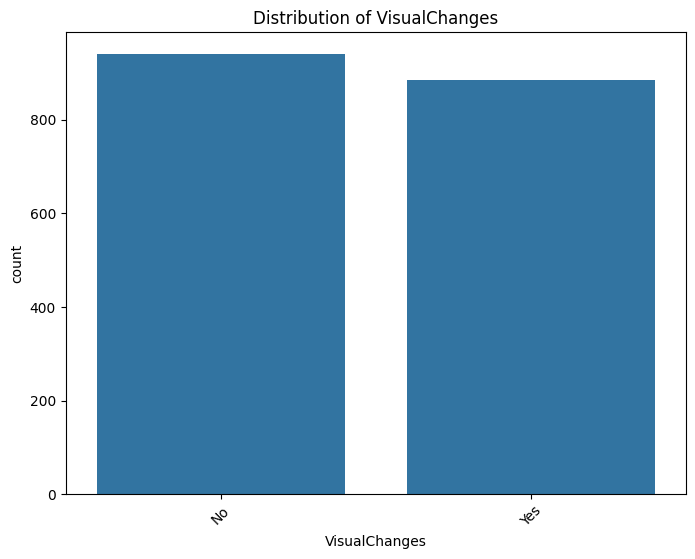

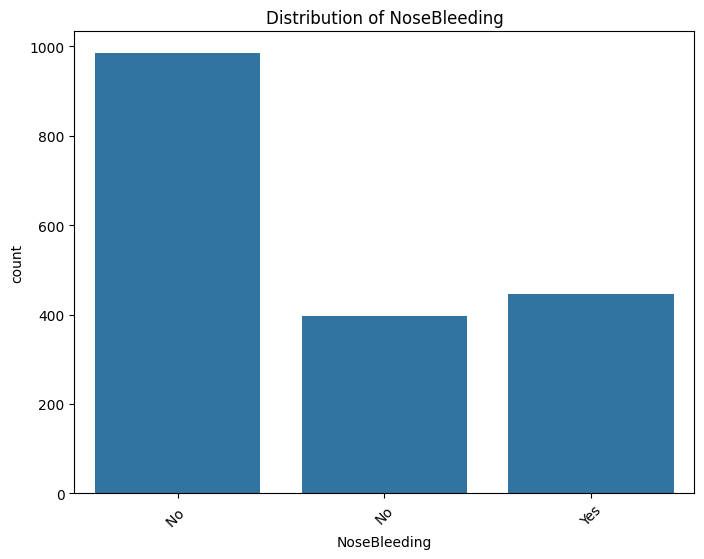

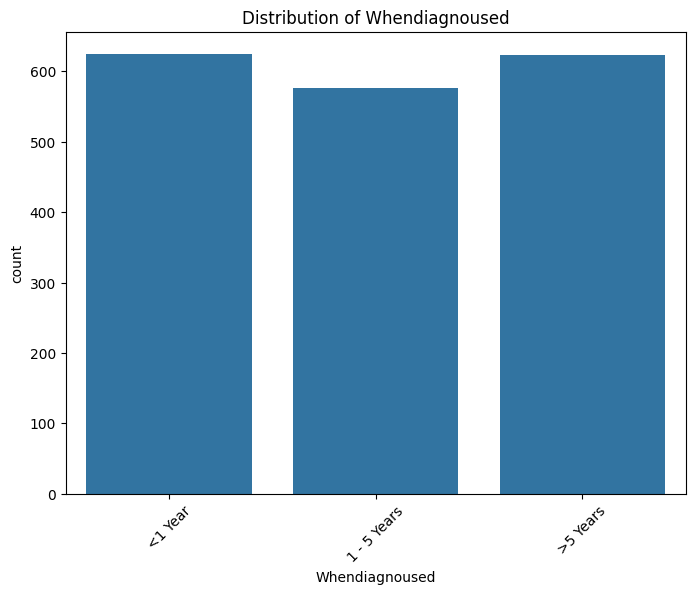

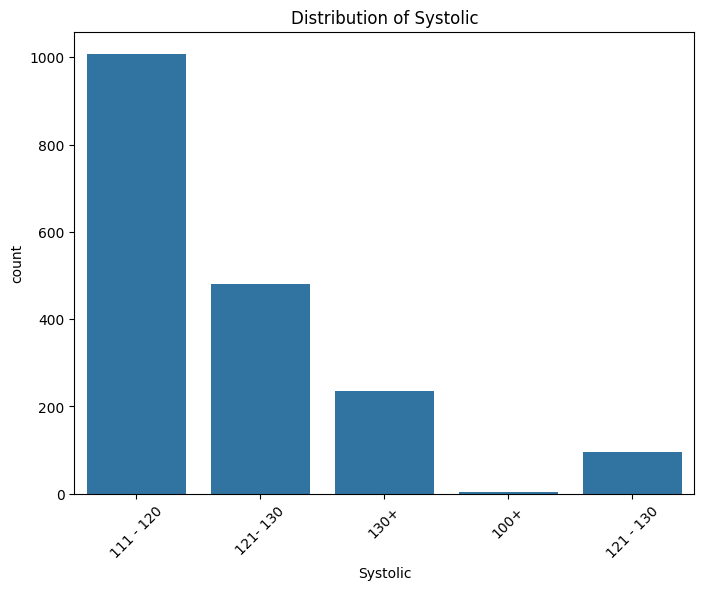

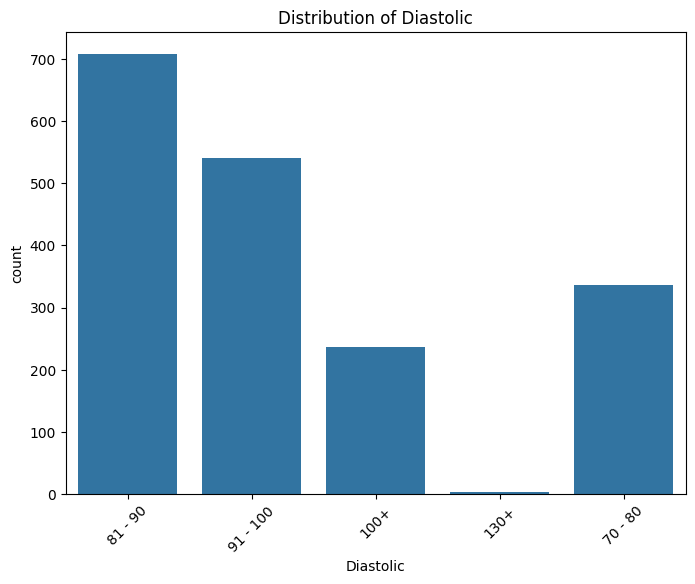

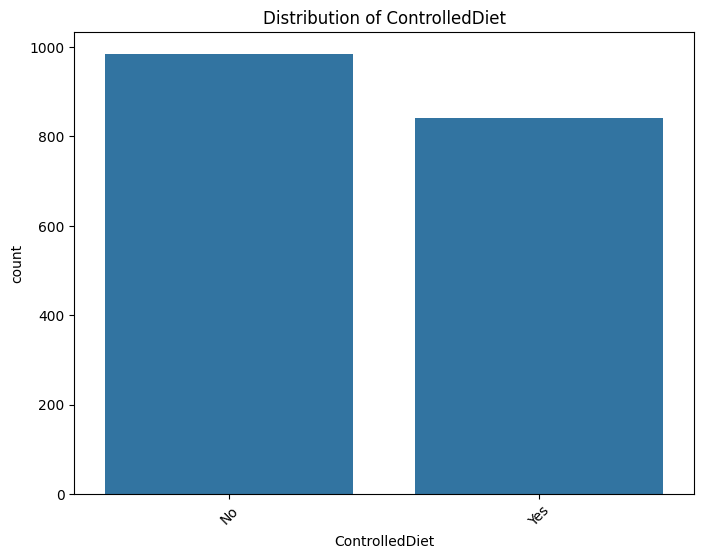

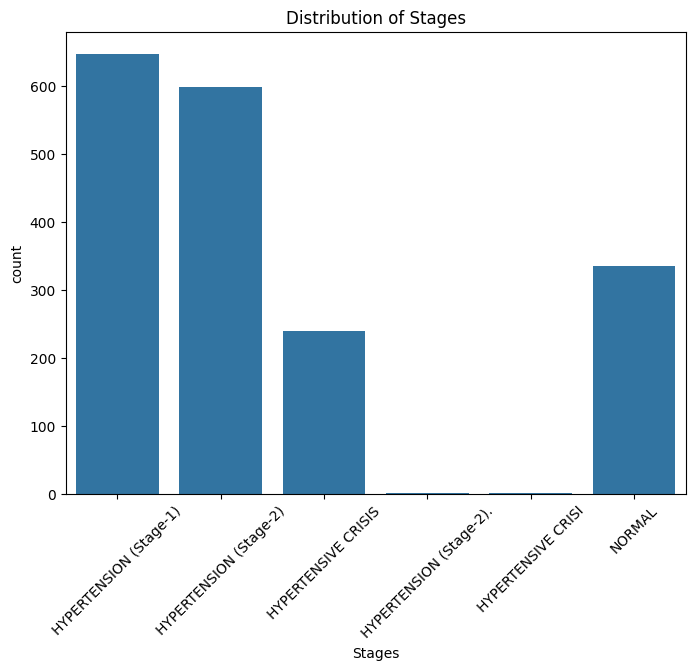

In [21]:
# Univariate analysis for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate analysis for numerical variables
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Bivariate Analysis

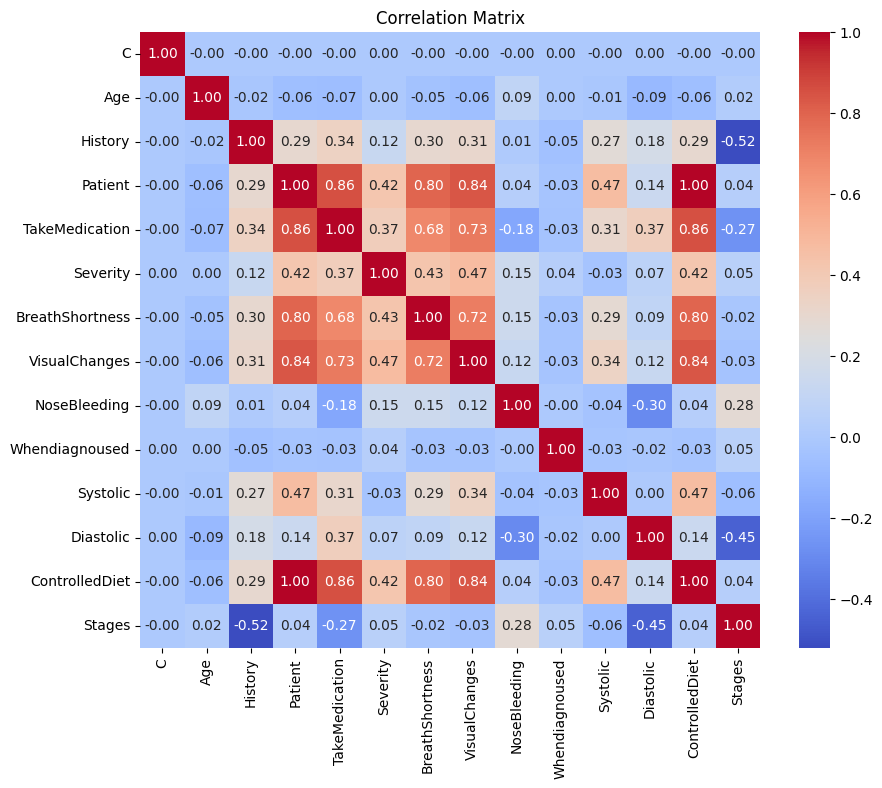

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Now compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Multivariate analysis


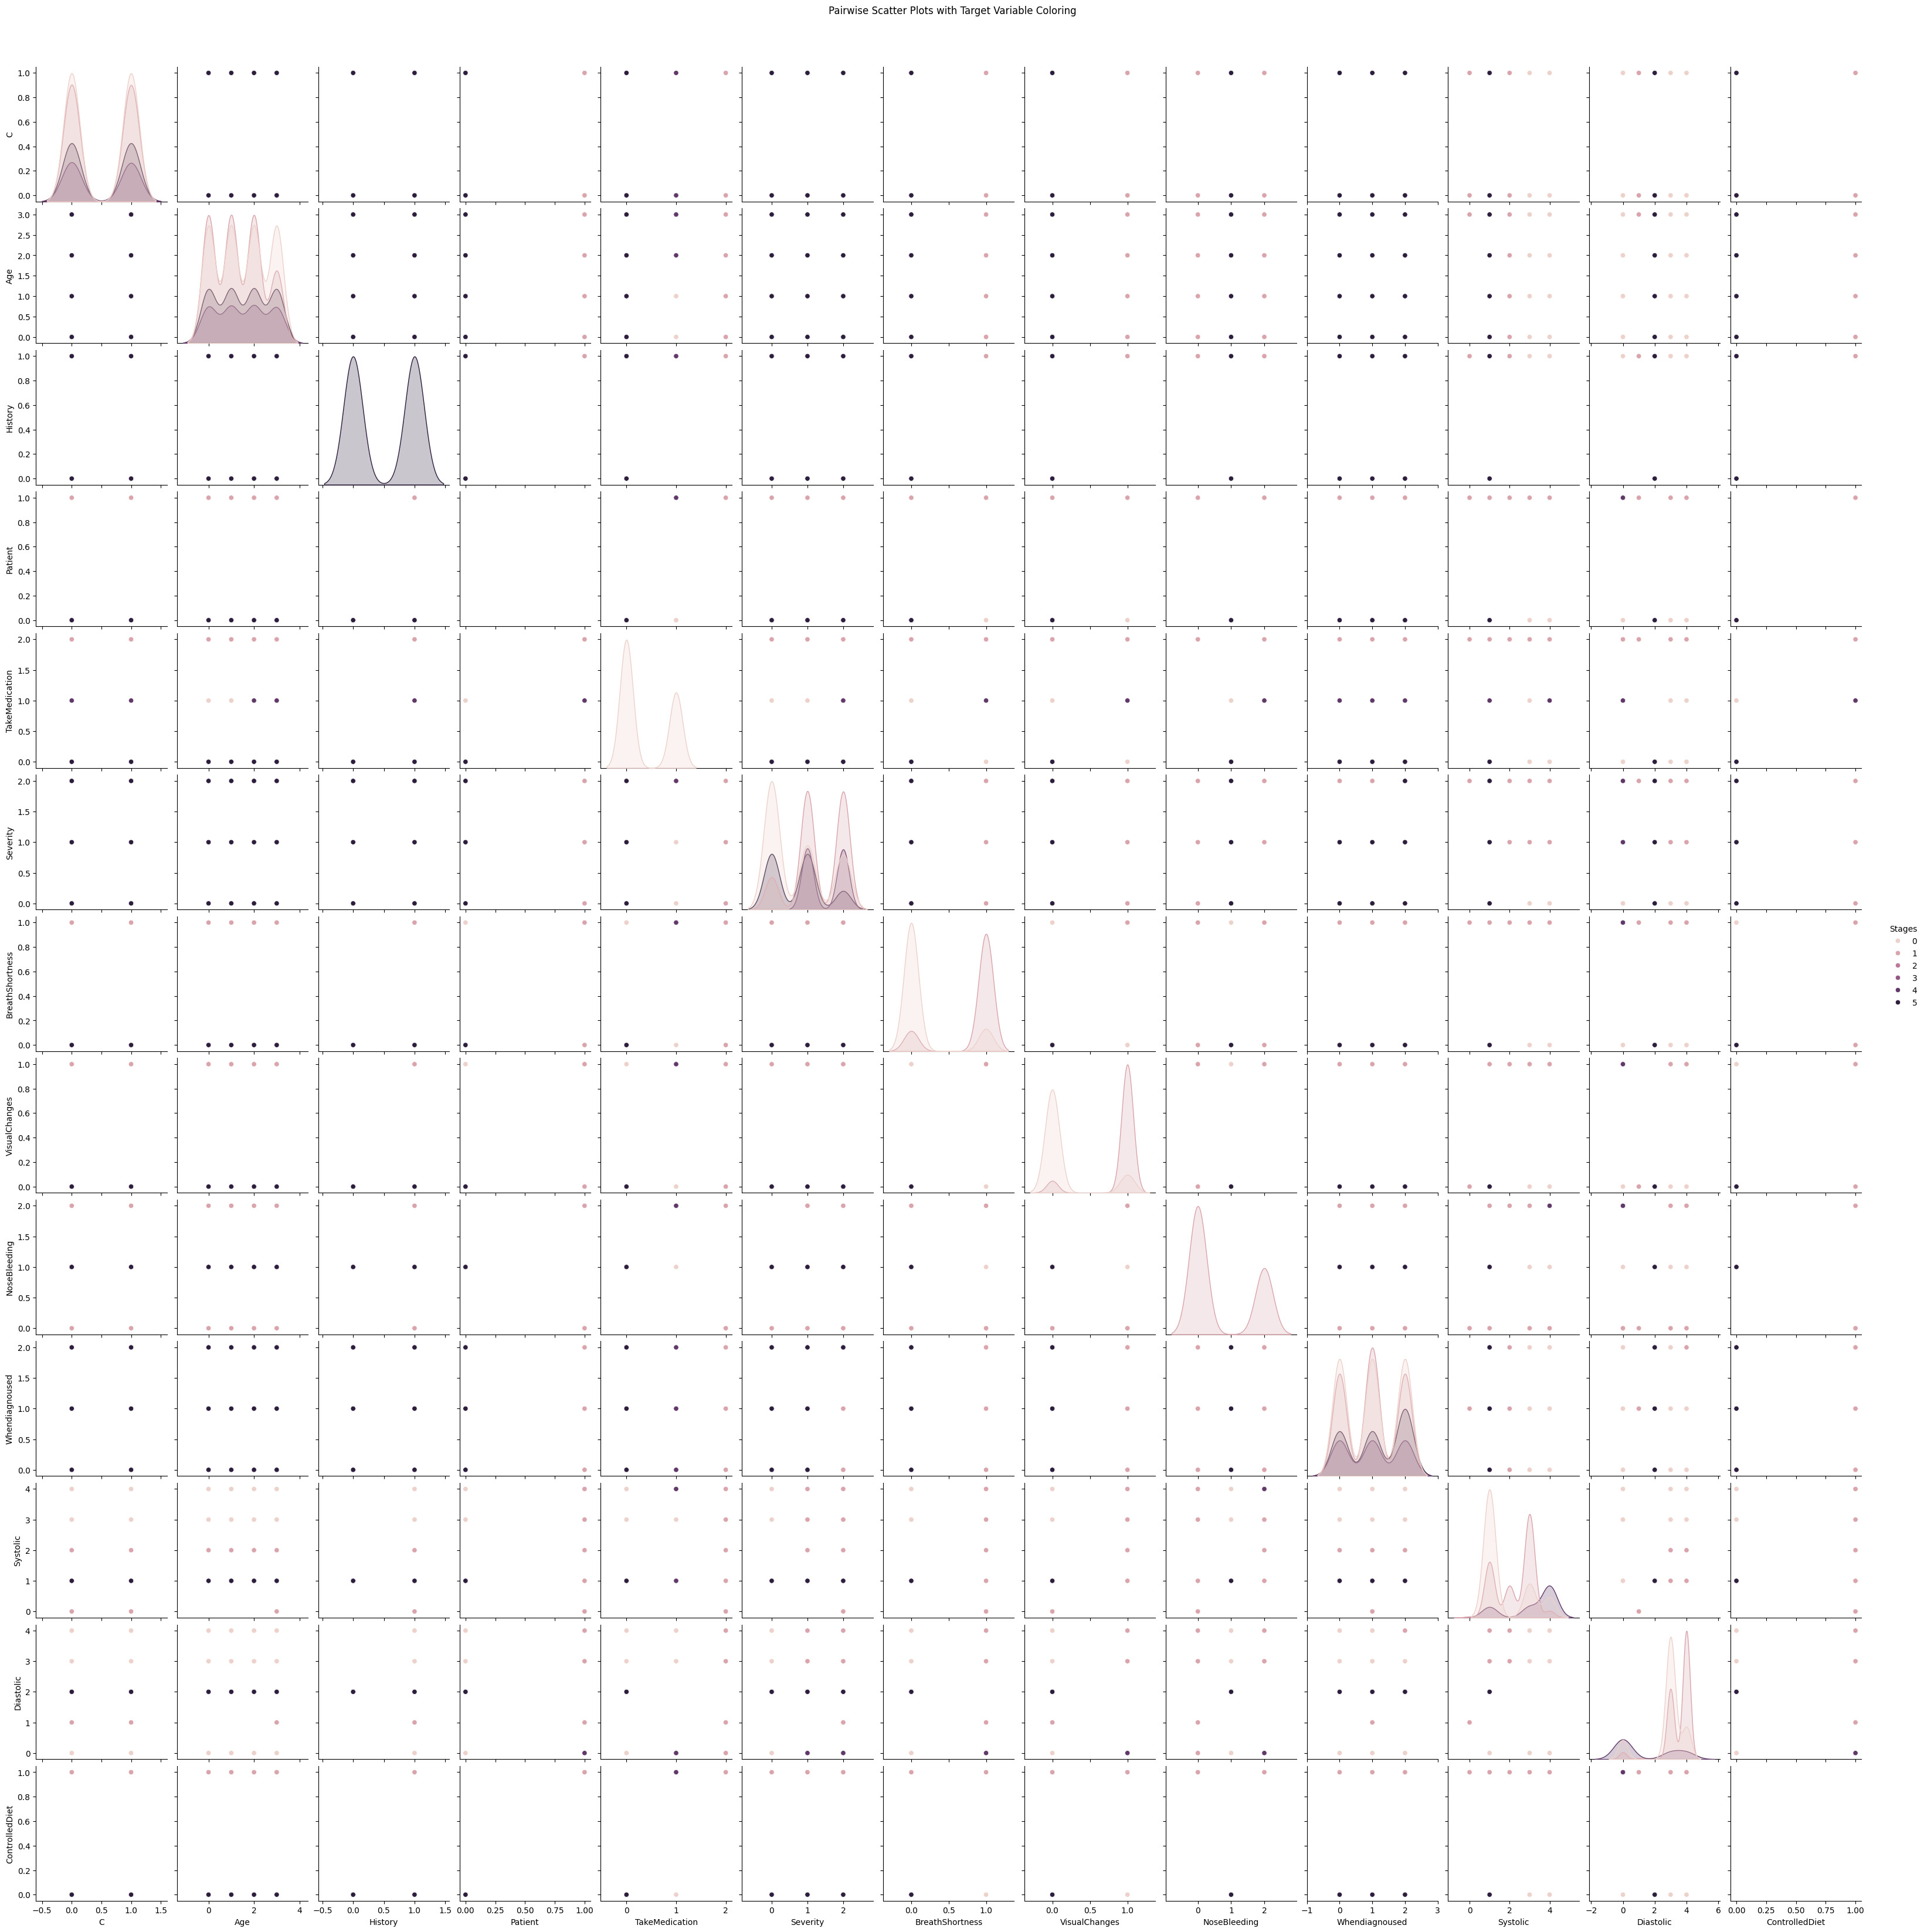

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for pairwise scatter plots
numeric_df = df.select_dtypes(include=['number'])

# Pairplot to visualize pairwise relationships
sns.pairplot(numeric_df, hue='Stages', diag_kind='kde')  # Use 'hue' if you have a target variable
plt.suptitle('Pairwise Scatter Plots with Target Variable Coloring', y=1.02)
plt.show()

### Model Building

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = 'patient_data.csv'
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target
X = df.drop('Stages', axis=1)
y = df['Stages']

# Remove rare classes (if any)
min_samples_per_class = 2
class_counts = Counter(y)
valid_indices = [i for i, label in enumerate(y) if class_counts[label] >= min_samples_per_class]

X_filtered = X.iloc[valid_indices].reset_index(drop=True)
y_filtered = y.iloc[valid_indices].reset_index(drop=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naïve Bayes": GaussianNB(),
    "Multinomial Naïve Bayes": MultinomialNB()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Handle MultinomialNB: Ensure all features are non-negative
    if name == "Multinomial Naïve Bayes":
        # MultinomialNB requires non-negative features
        X_train_non_negative = X_train.clip(lower=0)
        X_test_non_negative = X_test.clip(lower=0)

        model.fit(X_train_non_negative, y_train)
        y_pred = model.predict(X_test_non_negative)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {"model": model, "accuracy": acc}

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Select best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Save best model
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("\nModel saved as 'best_model.pkl'")


Training Logistic Regression...
Logistic Regression Accuracy: 0.9753
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       130
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        48
           5       0.94      0.93      0.93        67

    accuracy                           0.98       365
   macro avg       0.98      0.97      0.97       365
weighted avg       0.98      0.98      0.98       365

------------------------------------------------------------

Training Random Forest Regressor...
Random Forest Regressor Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        67

    accuracy                           1.00       365
   macro avg       1.00      1